# Scenario

We are working on preparing a prototype machine learning model for Zyfra, a company that developes efficiency solutions for heavy industry.

The ML model should predict the amount of gold (Au) recovered from gold ore using data on extraction and purification.

Machine learning prediction question: find the ML model that best predicts the two target values given the predictor variables present in both the test and train dataframes.

The target values are rougher.output.recovery & final.output.recovery 

Useful Features (predictor parameters common to both train and test dataframes)

Datasets: gold_recovery_full.csv, gold_recovery_train.csv, gold_recovery_test.csv

Analysis done December 2021

In [1]:
#import libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.utils import shuffle
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import make_scorer
from sklearn import metrics
import pandas as pd
import numpy as np

import random
random_state=42
random.seed(random_state)
np.random.seed(random_state)

# import sys and insert code to ignore warnings 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Download and prepare the data
# 1.1. Open the files and look into the data.


In [2]:
# load the data 
try:
    train = pd.read_csv('/datasets/gold_recovery_train.csv')
except:
    print('ERROR: Unable to find or access file.')
try:
    test = pd.read_csv('/datasets/gold_recovery_test.csv')
except:
    print('ERROR: Unable to find or access file.')
try:
    full = pd.read_csv('/datasets/gold_recovery_full.csv')
except:
    print('ERROR: Unable to find or access file.')

In [3]:
# create basic loop to get info on dfs
    
# create list of dfs
dfs = [train, test, full]

for df in dfs:
    print('\n')
    print("=" * 23)
    name =[x for x in globals() if globals()[x] is df][0]
    print("Dataframe Name: %s" % name)
    print("=" * 23)
    print('Number of duplicate rows:', df.duplicated().sum())
    print('Number rows and columns:', df.shape, '\n')
    print("Count total NaN at each column in a DataFrame :")
    print(df.isnull().sum())



Dataframe Name: train
Number of duplicate rows: 0
Number rows and columns: (16860, 87) 

Count total NaN at each column in a DataFrame :
date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64


Dataframe Name: test
Number of duplicate rows: 0
Number rows and columns: (5856, 53) 

Count total NaN at each column in a DataFrame :
date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284

In [4]:
full.head(1)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


In [5]:
train.head(1)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


In [6]:
test.head(1)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.31785,4.872511,-500.037437,26.705889,-499.709414


We note three dfs: train, test, full. There are no duplicates, but many NaN values in every df. 

The full df contains all the training and test sets. The test df only contains 53 columns, while the train and full dfs contain 87.

We've been told some parameters are not available because they were measured and/or calculated much later. We are told some of the features that are present in the training set may be absent from the test set. "The test set also doesn't contain targets."

# 1.2. Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

In [7]:
# calculate MAE
rougher_output_recovery_calc = 100 * (train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - train['rougher.output.tail_au'])) / (train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au']))
df_output_rougher = pd.DataFrame({"output_recovery":train["rougher.output.recovery"],"calc":rougher_output_recovery_calc}).dropna()
MAE = mean_absolute_error(df_output_rougher["output_recovery"],df_output_rougher["calc"])
print(f"MAE={MAE}")

MAE=1.0898633667227423e-14


The MAE is very small, indicating the recovery is calculated correctly.

# 1.3. Analyze the features not available in the test set. What are these parameters? What is their type?

In [8]:
# list the features in the full set
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [9]:
# list the features not available in test set
not_in_test = full.columns.difference(test.columns)
full[not_in_test].head(1)

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_ag,final.output.tail_au,final.output.tail_pb,final.output.tail_sol,primary_cleaner.output.concentrate_ag,...,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_au,rougher.output.tail_pb,rougher.output.tail_sol,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol
0,6.055403,42.19202,9.889648,5.507324,70.541216,10.411962,2.143149,0.895447,16.904297,8.547551,...,28.029297,87.107763,5.008018,1.170244,0.508728,19.154297,14.500184,2.606185,4.694824,8.764648


In [10]:
# list the parameters and types of features not available in test set
full[not_in_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 34 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_au                                  22635 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
primary_cleaner.output.concentrate_ag                 22618 non-null float64
primary_cleaner.output.concentrate_au                 22618 non-null float64
primary_cleaner.output.concentrate_pb       

So we anticipated 34 columns (87 in train/full - 53 in test) would be missing in test and we've now verified the columns that are missing. 

We observe all 34 are float64 types and are different different measurements that have to do with output. 

Our 2 target features, final.output.recovery & rougher.output.recovery, are also missing from the test df.

We were told the full df has all the records for the train and test dfs. We will investigate if we can replace the values for our targets from the full df.

# 1.4. Perform data preprocessing.

We need to add the target columns (final.output.recovery and rougher.output.recovery) to the test df. 

We will use the date column, after verifying there are no duplicates, as the index so we fill in corresponding information for the appropriate rows.

In [11]:
# check for duplicates in date columns
full["date"].is_unique

True

In [12]:
test["date"].is_unique

True

Each entry in the date column is unique for both the full and test dataframes. Now we can add the columns.

In [13]:
# create a temporary df from full with target columns
df1 = pd.DataFrame(full, columns = ['final.output.recovery', 'rougher.output.recovery', 'date'])
print('Temporary df', df1.shape)
print('Test df before', test.shape)
# add target columns to test df using the reference date as index
test_w_targets = pd.merge(test, df1, on="date", how="inner")
print('Test df after', test_w_targets.shape, '\n')
print(test_w_targets.info())

Temporary df (22716, 3)
Test df before (5856, 53)
Test df after (5856, 55) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
p

In [14]:
# select a date from a random row in test
test_row = test.iloc[227,0]
# Verify columns match using date as index in full and test dfs
cols = ['final.output.recovery', 'rougher.output.recovery', 'rougher.input.feed_ag', 'secondary_cleaner.state.floatbank2_b_level', 'date']
f_row = full.loc[full['date'] == test_row]
f_row[cols]

,final.output.recovery,rougher.output.recovery,rougher.input.feed_ag,secondary_cleaner.state.floatbank2_b_level,date
5748,67.095935,86.057861,9.750016,-500.434766,2016-09-10 11:59:59


In [15]:
t_row = test_w_targets.loc[test_w_targets['date'] == test_row]
t_row[cols]

,final.output.recovery,rougher.output.recovery,rougher.input.feed_ag,secondary_cleaner.state.floatbank2_b_level,date
227,67.095935,86.057861,9.750016,-500.434766,2016-09-10 11:59:59


We added the target columns to the test df using the date column as an index and verified the columns match (full --> test) by displaying sample columns in rows from test_w_targets df and full df.

In [16]:
# check missing values
print('\nRows with missing values in target values in test df:')
print(test_w_targets['final.output.recovery'].isna().sum())
print(test_w_targets['rougher.output.recovery'].isna().sum())


Rows with missing values in target values in test df:
442
546


We've verified the new columns, final.output.recovery and rougher.output.recovery, have been added, but we still have NaN values in those targets. There is really no way for us to fill in the target values, so we will need to delete those rows.

In [17]:
# eliminate rows without target values
test_w_targets = test_w_targets[~test_w_targets['final.output.recovery'].isna()]
test_w_targets = test_w_targets[~test_w_targets['rougher.output.recovery'].isna()]
test_w_targets.info()
print('\nRows with missing values in target values in test df:')
print(test_w_targets['final.output.recovery'].isna().sum())
print(test_w_targets['rougher.output.recovery'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5855
Data columns (total 55 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

Similarly, the train df is used to train the model and we need to check for missing values in the target columns. We should drop any of those rows since we do not have a way to replace the target values.

In [18]:
# check for NaNs in target value columns for train df
print('\nRows with missing values in target values in train df:')
print(train['final.output.recovery'].isna().sum())
print(train['rougher.output.recovery'].isna().sum())


Rows with missing values in target values in train df:
1521
2573


In [19]:
# eliminate rows without target values since we don't have
# any way to fill in values
train = train[~train['final.output.recovery'].isna()]
train = train[~train['rougher.output.recovery'].isna()]
train.info()
print('\nRows with missing values in target values in train df:')
print(train['final.output.recovery'].isna().sum())
print(train['rougher.output.recovery'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

We've verified the rows with missing values in the target columns have been deleted. Next we will change datatypes and fill in values for train and test dfs.

In [20]:
# create new dfs list
dfs = [test_w_targets, train]

# check datatypes
for df in dfs:
    df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5855
Data columns (total 55 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [21]:
# change the date datatype
for df in dfs:
    df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d %H:%M:%S', errors = 'coerce')
    # verify change to datetime                            
    print(df["date"])

0      2016-09-01 00:59:59
1      2016-09-01 01:59:59
2      2016-09-01 02:59:59
3      2016-09-01 03:59:59
4      2016-09-01 04:59:59
               ...        
5851   2017-12-31 19:59:59
5852   2017-12-31 20:59:59
5853   2017-12-31 21:59:59
5854   2017-12-31 22:59:59
5855   2017-12-31 23:59:59
Name: date, Length: 5290, dtype: datetime64[ns]
0       2016-01-15 00:00:00
1       2016-01-15 01:00:00
2       2016-01-15 02:00:00
3       2016-01-15 03:00:00
4       2016-01-15 04:00:00
                ...        
16855   2018-08-18 06:59:59
16856   2018-08-18 07:59:59
16857   2018-08-18 08:59:59
16858   2018-08-18 09:59:59
16859   2018-08-18 10:59:59
Name: date, Length: 14149, dtype: datetime64[ns]


We change the datatype for date to datetime from object. The other columns are type float64, which is appropriate.

Next we will fill in missing values for test and train. We were told "Parameters that are next to each other in terms of time are often similar," so we plan to use the forward fill strategy - ffill - since it propagates the last valid observation forward.

In [22]:
# fillna and verify
test_w_targets = test_w_targets.fillna(method='ffill')
train = train.fillna(method='ffill')
    
print(test_w_targets.isnull().sum().sum())
print(train.isnull().sum().sum())


0
0


We've verified the missing data has been filled using ffill. Finally we can drop the date column as it will not be useful for our models.

In [23]:
# remove date column from train and test dfs
test_w_targets.drop('date', inplace=True, axis=1)
train.drop('date', inplace=True, axis=1)
print('Verify new shapes after dropping date col')
print(test_w_targets.shape)
print(train.shape)

Verify new shapes after dropping date col
(5290, 54)
(14149, 86)


# Analyze the data
# 2.1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [24]:
# returns columns of dfs with selected strings
def cols_with_str(df, string):
    cols = [col for col in df.columns if string in col]
    print(list(df[cols]))
    return df[cols]

def rougher_feed(df, metal, rougher, feed, inpu):    
    au_rougher = cols_with_str(train,metal)
    au_rougher = cols_with_str(au_rougher,rougher)
    au_rougher = cols_with_str(au_rougher,feed)
    au_rougher = cols_with_str(au_rougher,inpu)
    mean = au_rougher.mean()
    return mean[0]

In [25]:
# create features [stage].[parameter_type].[parameter_name] Example: rougher.input.feed_ag
metal = ['ag', 'au', 'pb']
stage = ['rougher', 'primary_cleaner', 'secondary_cleaner', 'final']
param = ['input', 'output', 'state', 'calculation']

# create accumulators for different stages
au_rougher_feed_input = rougher_feed(full,'au','rougher','feed', 'input') 
ag_rougher_feed_input = rougher_feed(full,'ag','rougher','feed', 'input')
pb_rougher_feed_input = rougher_feed(full,'pb','rougher','feed', 'input')

au_rougher_output_tail = rougher_feed(full,'au','rougher','output', 'tail') 
ag_rougher_output_tail = rougher_feed(full,'ag','rougher','output', 'tail') 
pb_rougher_output_tail = rougher_feed(full,'pb','rougher','output', 'tail')

au_rougher_output_concentrate = rougher_feed(full,'au','rougher','output', 'concentrate')
ag_rougher_output_concentrate = rougher_feed(full,'ag','rougher','output', 'concentrate')
pb_rougher_output_concentrate = rougher_feed(full,'pb','rougher','output', 'concentrate')

au_final_output_tail = rougher_feed(full,'au','final','output', 'tail') 
ag_final_output_tail = rougher_feed(full,'ag','final','output', 'tail')
pb_final_output_tail = rougher_feed(full,'pb','final','output', 'tail')

au_primary_output_concentrate = rougher_feed(full,'au','primary','output','concentrate')
ag_primary_output_concentrate = rougher_feed(full,'ag','primary','output','concentrate')
pb_primary_output_concentrate = rougher_feed(full,'pb','final','output','concentrate')

au_final_output_concentrate = rougher_feed(full,'au','final','output','concentrate')
ag_final_output_concentrate = rougher_feed(full,'ag','final','output','concentrate')
pb_final_output_concentrate = rougher_feed(full,'pb','final','output','concentrate')

['final.output.concentrate_au', 'final.output.tail_au', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_au']
['rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']
['rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.input.feed_au']
['rougher.input.feed_au']
['final.output.concentrate_ag', 'final.output.tail_ag', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output

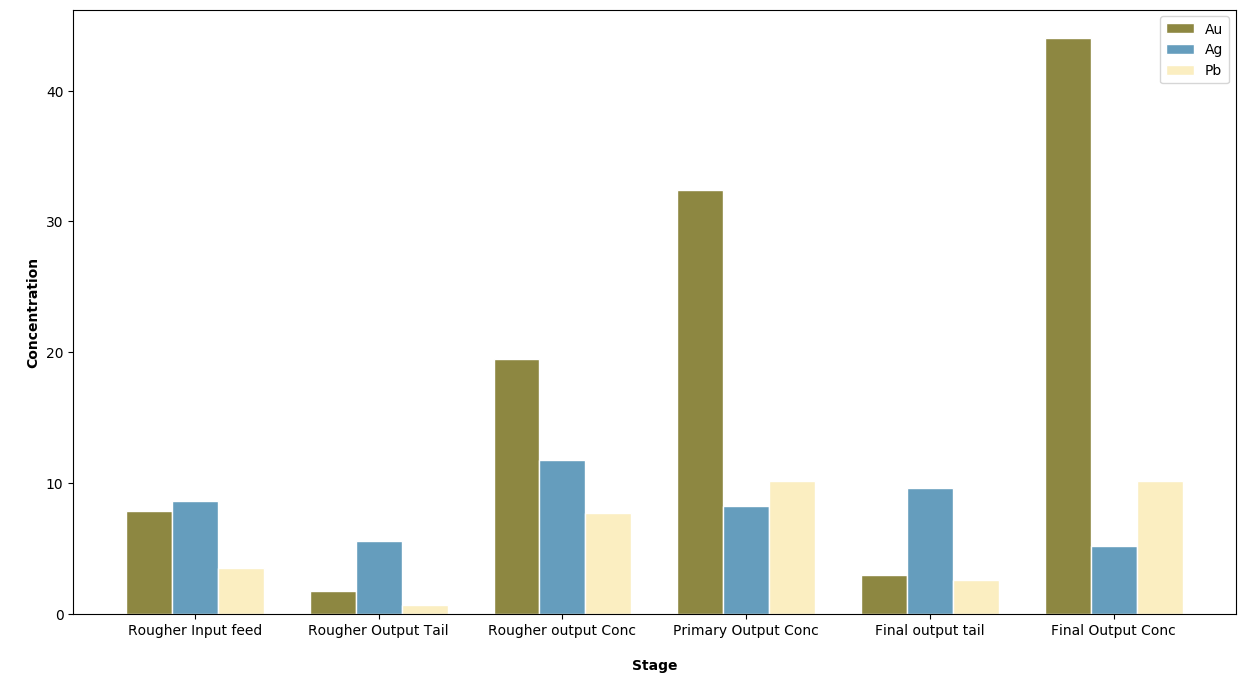

In [26]:
# graph concentrations of metals at different stages
plt.figure(figsize=(15,8), dpi= 100, facecolor='w', edgecolor='k')
labels = ['Au', 'Ag', 'Pb']
bars1 = [au_rougher_feed_input, au_rougher_output_tail, au_rougher_output_concentrate, au_primary_output_concentrate, au_final_output_tail, au_final_output_concentrate]
bars2 = [ag_rougher_feed_input, ag_rougher_output_tail, ag_rougher_output_concentrate, ag_primary_output_concentrate, ag_final_output_tail, ag_final_output_concentrate]
bars3 = [pb_rougher_feed_input, pb_rougher_output_tail, pb_rougher_output_concentrate, pb_primary_output_concentrate, pb_final_output_tail, pb_final_output_concentrate]

barWidth = 0.25

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#8D8741', width=barWidth, edgecolor='white', label='Au')
plt.bar(r2, bars2, color='#659DBD', width=barWidth, edgecolor='white', label='Ag')
plt.bar(r3, bars3, color='#FBEEC1', width=barWidth, edgecolor='white', label='Pb')
 
# Add xticks on the middle of the group bars
plt.xlabel('\nStage', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], [
    'Rougher Input feed', 'Rougher Output Tail', 'Rougher output Conc', 'Primary Output Conc', 
    'Final output tail', 'Final Output Conc'])
plt.ylabel('\nConcentration', fontweight='bold')
 
# Create legend & Show graphic
plt.legend()
plt.show()

We note the concentration across the stages and the increase in gold in the primary and final outputs. The concentration of lead also increases, but not by that much from the begining. The silver concentration decreases. We note this is the expected result.

# 2.2. Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

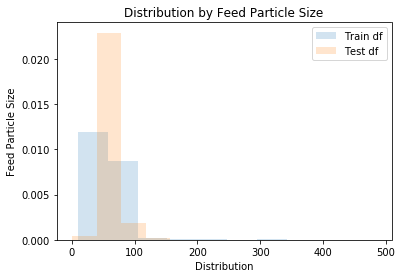

In [27]:
# graph distributions by feed particle size for test/train dfs
plt.hist(train['rougher.input.feed_size'], alpha=.2, density=True);
plt.hist(test_w_targets['rougher.input.feed_size'], alpha=.2, density=True);
plt.legend(['Train df', 'Test df'])
plt.title("Distribution by Feed Particle Size")
plt.ylabel("Feed Particle Size")
plt.xlabel("Distribution")
plt.show()

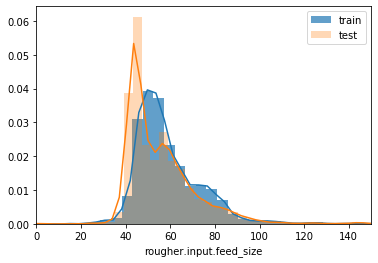

In [28]:
# graph input feed size for test/train dfs
sns.distplot(train["rougher.input.feed_size"], bins=100, hist_kws=dict(alpha=0.7), label="train")
g = sns.distplot(test_w_targets["rougher.input.feed_size"], bins=100, hist_kws=dict(alpha=0.3), label="test")
g.set(xlim=(0, 150))
g.legend()
plt.show()

We note broad similarity between the distribution of feed particle size for both the test and train dfs.

This suggests the dataframes are comparable, at least as far as feed particle size is concerned.

# 2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

We plan to use graphs and boxplots to identify outliers and then will consider removing them.

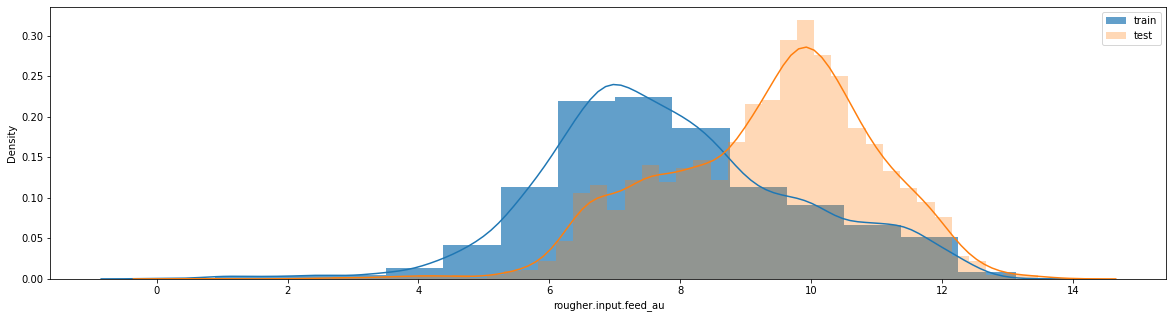

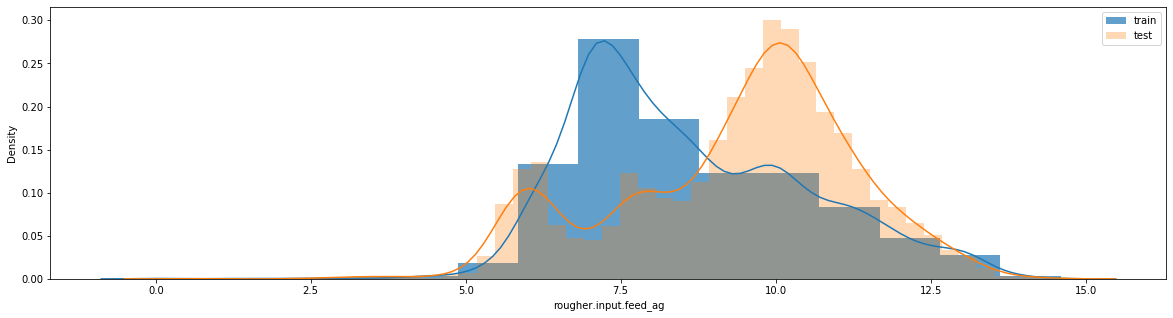

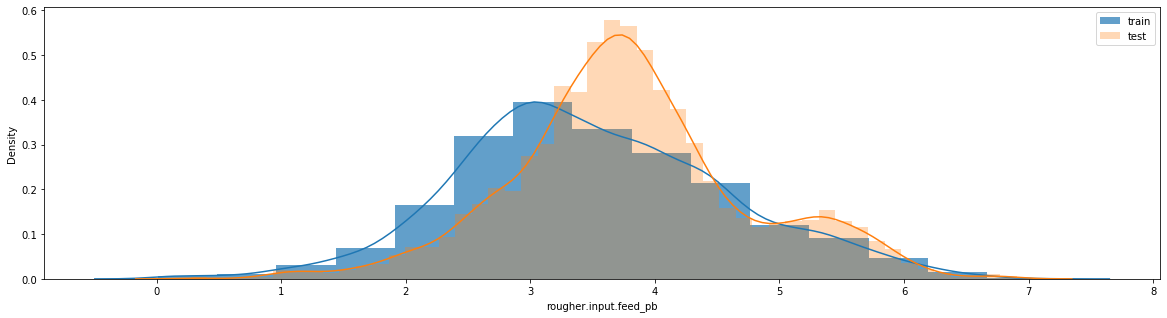

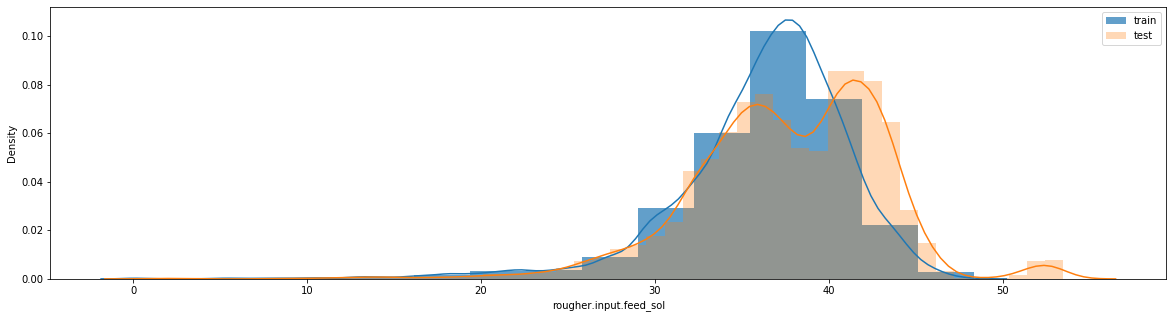

In [29]:
# graph concentrations for test_w_targets and train dfs with input

# create list of substances common to both test_w_targets and train
stages = [
    'rougher.input.feed_au', 'rougher.input.feed_ag', 
    'rougher.input.feed_pb', 'rougher.input.feed_sol'
    ]

for s in stages:
    plt.figure(figsize=(20,5))
    sns.distplot(train[s],bins=15, hist_kws=dict(alpha=0.7), label="train")
    g = sns.distplot(test_w_targets[s],hist_kws=dict(alpha=0.3), label="test")
    g.legend()
    plt.ylabel('Density')
    plt.show() 

Train Dataframe


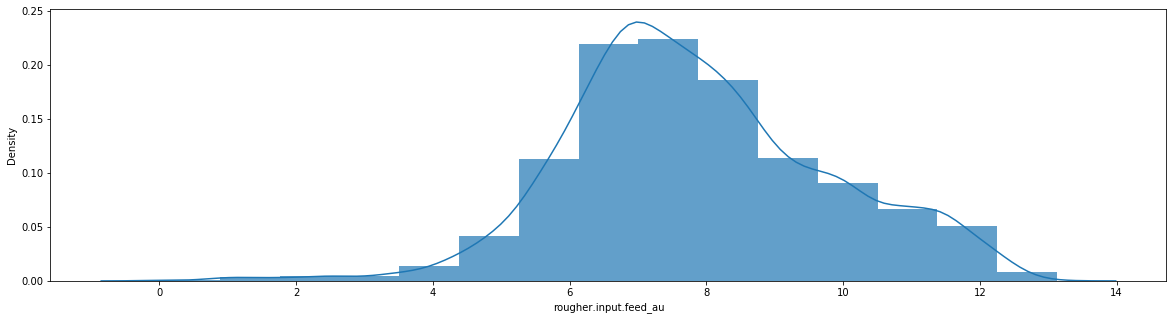

Train Dataframe


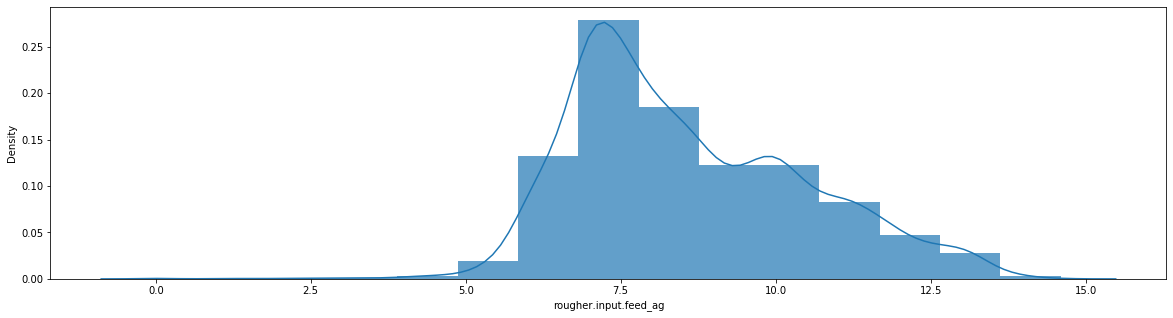

Train Dataframe


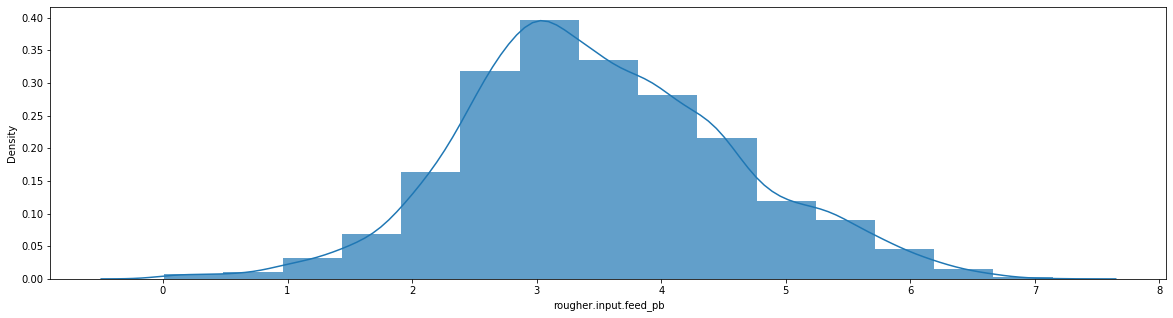

Train Dataframe


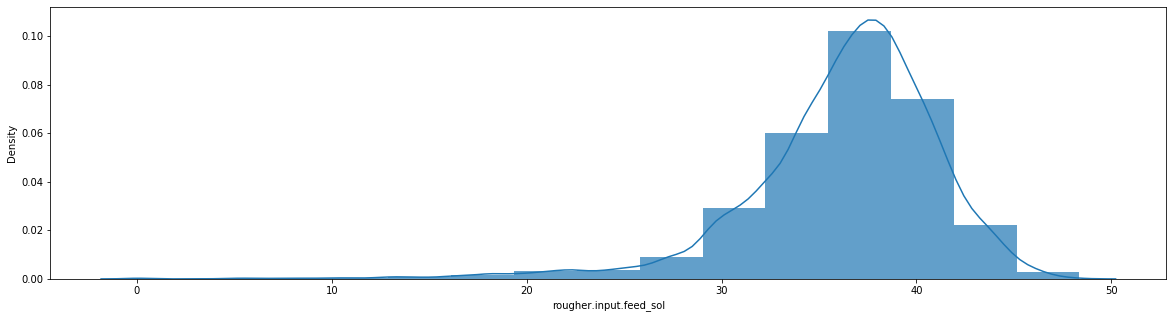

In [30]:
# check test_w_targets and train individually on the input feeds
for s in stages:
    plt.figure(figsize=(20,5))
    print('Train Dataframe')
    sns.distplot(train[s], bins=15, hist_kws=dict(alpha=0.7), label="train")
    plt.ylabel('Density')
    plt.show()

Test Dataframe


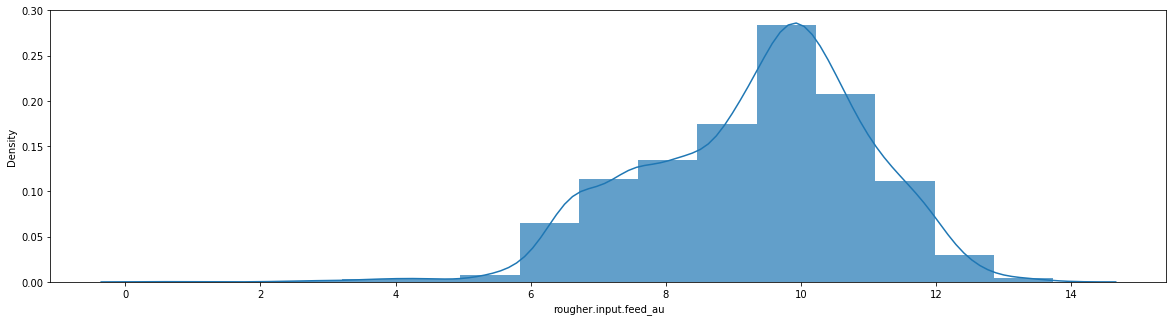

Test Dataframe


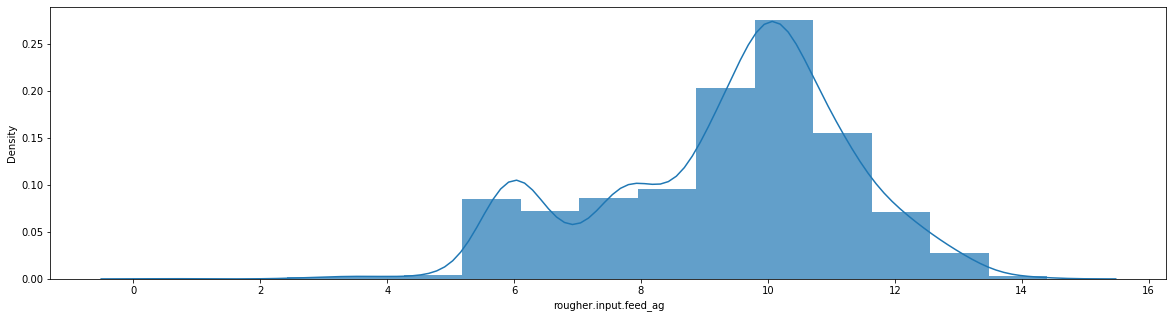

Test Dataframe


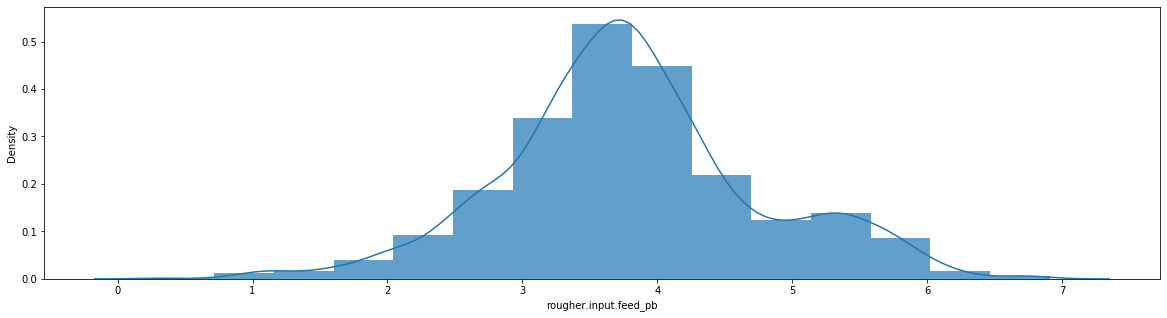

Test Dataframe


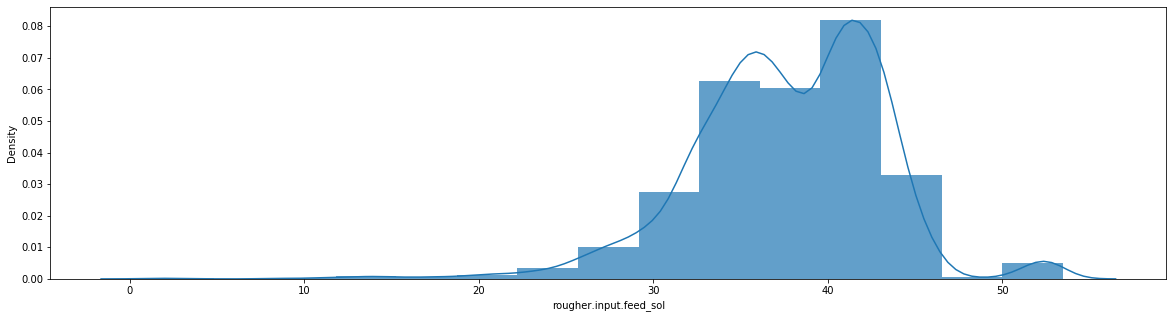

In [31]:
for s in stages:
    plt.figure(figsize=(20,5))
    print('Test Dataframe')
    sns.distplot(test_w_targets[s], bins=15, hist_kws=dict(alpha=0.7), label="train")
    plt.ylabel('Density')
    plt.show()

Train Dataframe


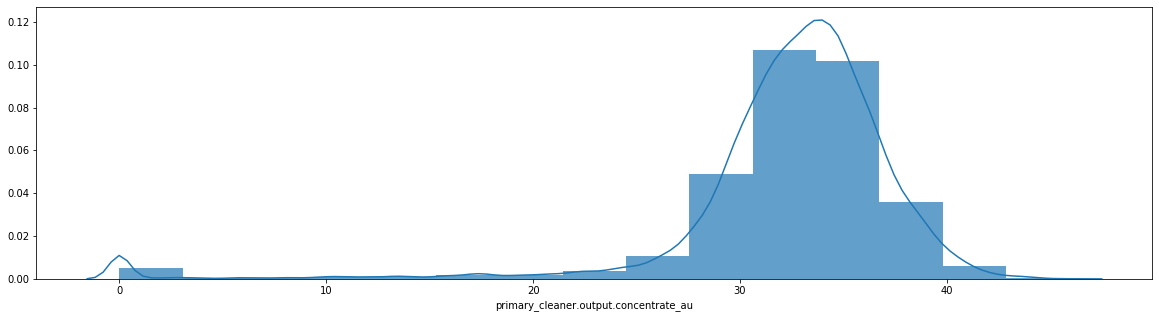

Train Dataframe


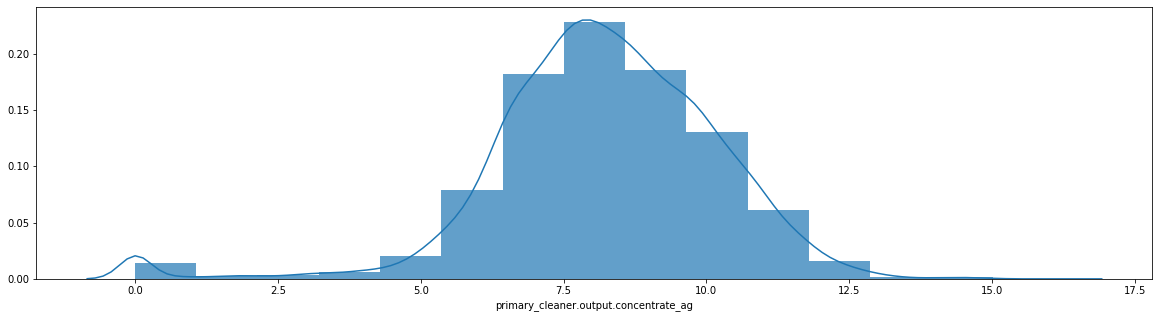

Train Dataframe


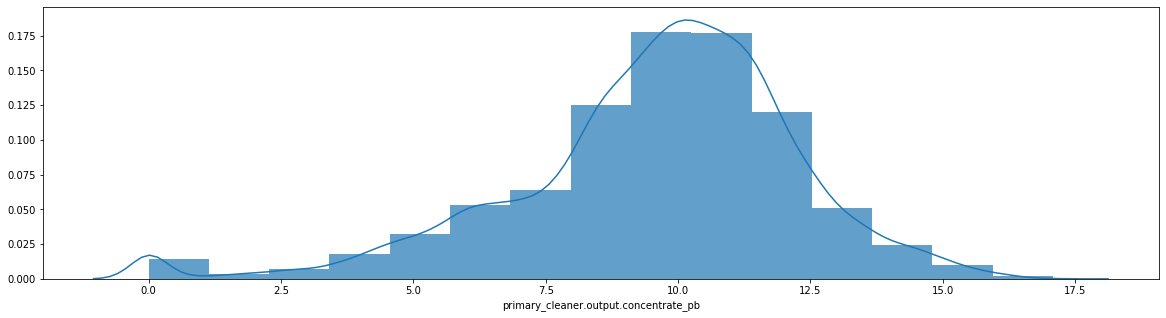

Train Dataframe


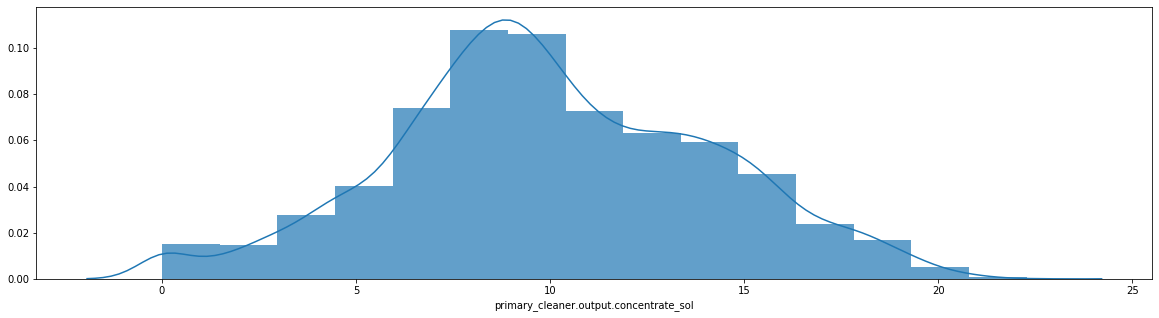

Train Dataframe


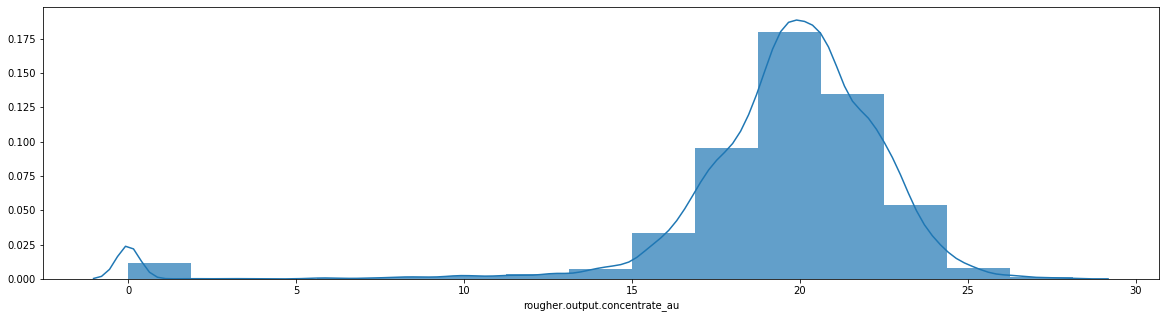

Train Dataframe


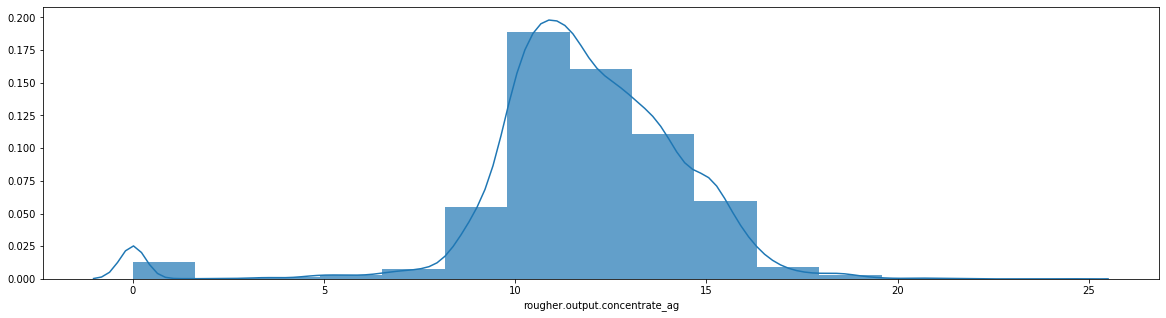

Train Dataframe


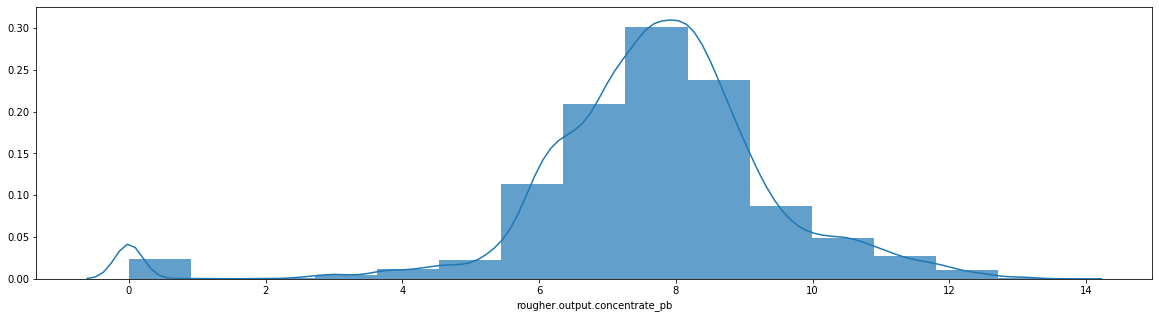

Train Dataframe


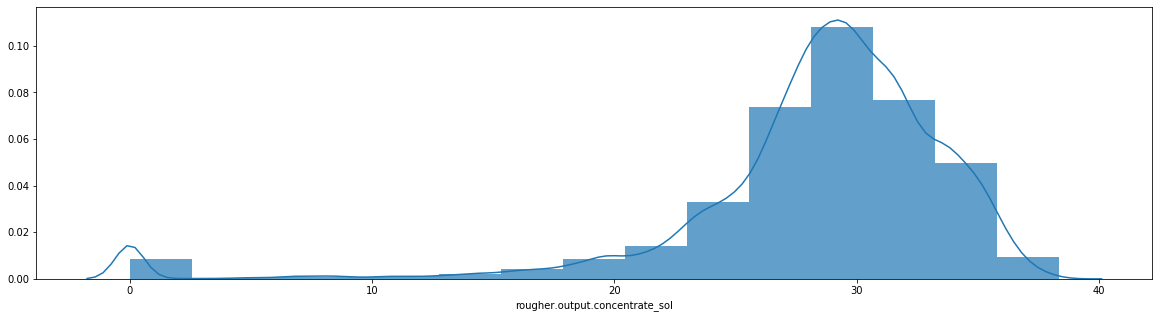

Train Dataframe


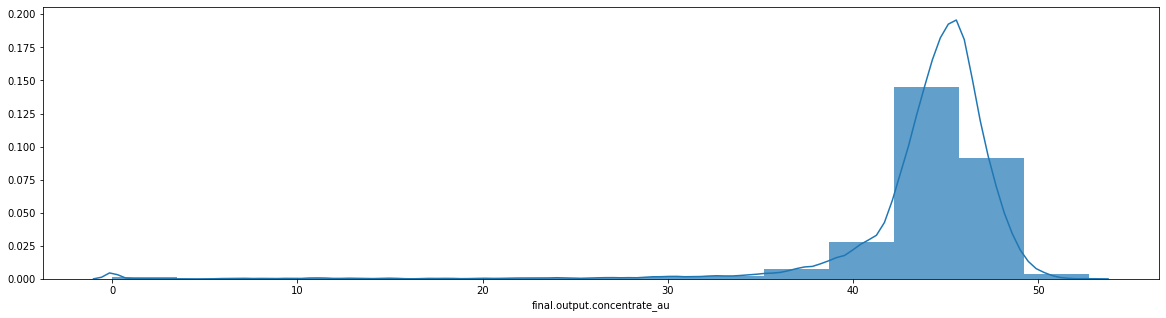

Train Dataframe


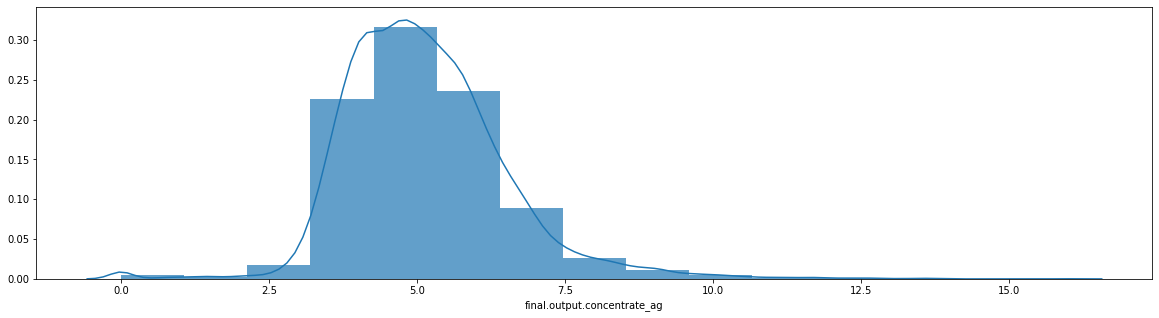

Train Dataframe


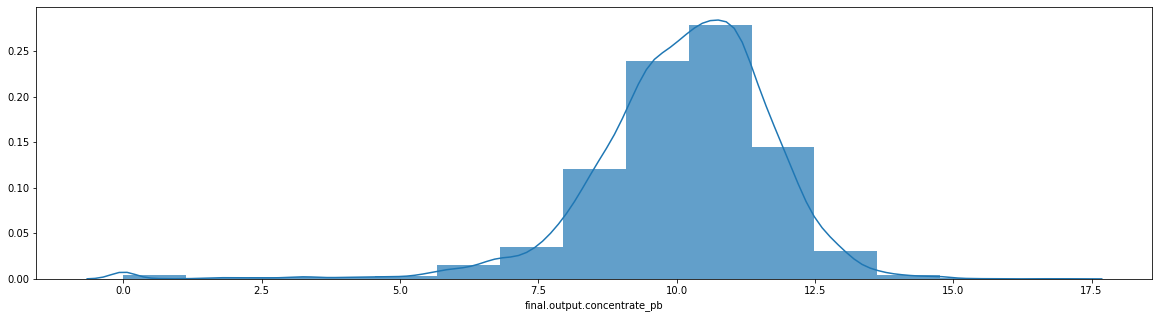

Train Dataframe


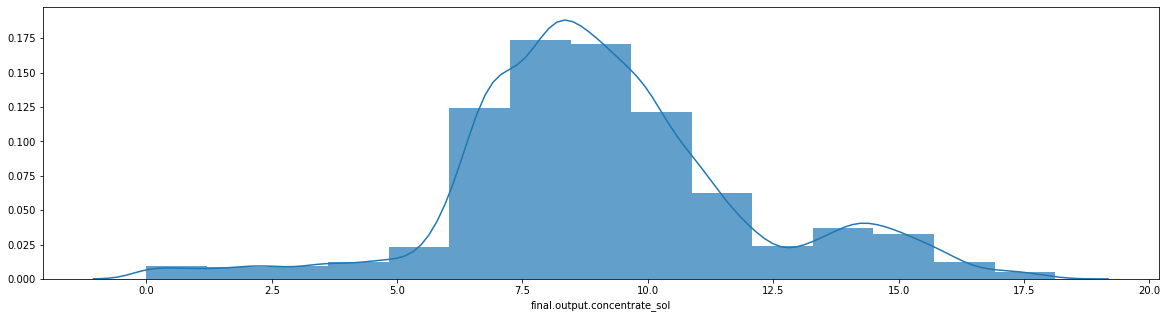

In [32]:
# graph concentrations for for train where test df doesn't have those columns

stages2 = [
    'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 
    'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol',
    'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 
    'rougher.output.concentrate_pb','rougher.output.concentrate_sol',
    'final.output.concentrate_au', 'final.output.concentrate_ag', 
    'final.output.concentrate_pb', 'final.output.concentrate_sol'
    ]

for s in stages2:
    plt.figure(figsize=(20,5))
    print('Train Dataframe')
    sns.distplot(train[s],bins=15, hist_kws=dict(alpha=0.7), label="train")
    plt.show()
    

We observe many outliers in the columns specific to the train df. Many anomolies appear to occur on the lower end, around 0.

There don't appear to be any major anomalies in the rougher.input.feed_* for the dfs, but there are noticiable outliers.

We will use the boxplot method to investigate further.

rougher.input.feed_au Outliers:  35
rougher.input.feed_au Pct: 0.66%
rougher.input.feed_ag Outliers:  24
rougher.input.feed_ag Pct: 0.45%
rougher.input.feed_pb Outliers:  195
rougher.input.feed_pb Pct: 3.69%
rougher.input.feed_sol Outliers:  129
rougher.input.feed_sol Pct: 2.44%


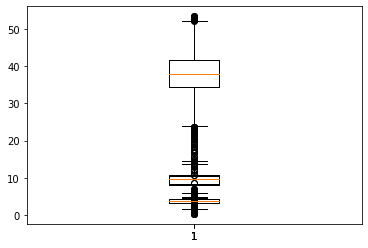

In [33]:
# check for outliers in test_w_targets df input feed columns
for s in stages:
    boxplot = plt.boxplot(test_w_targets[s].values)
    outliers = list(boxplot["fliers"][0].get_data()[1])
    print(s, "Outliers: ", len(outliers))
    pct = len(outliers)/len(test_w_targets)
    print(s, "Pct: {:.2%}".format(pct))

rougher.input.feed_au Outliers:  125
rougher.input.feed_au Pct: 2.36%
rougher.input.feed_ag Outliers:  29
rougher.input.feed_ag Pct: 0.55%
rougher.input.feed_pb Outliers:  118
rougher.input.feed_pb Pct: 2.23%
rougher.input.feed_sol Outliers:  515
rougher.input.feed_sol Pct: 9.74%


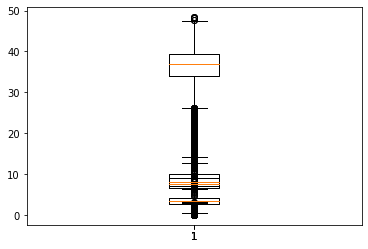

In [34]:
# check for outliers in test_w_targets df input feed columns
for s in stages:
    boxplot = plt.boxplot(train[s].values)
    outliers = list(boxplot["fliers"][0].get_data()[1])
    print(s, "Outliers: ", len(outliers))
    pct = len(outliers)/len(test_w_targets)
    print(s, "Pct: {:.2%}".format(pct))

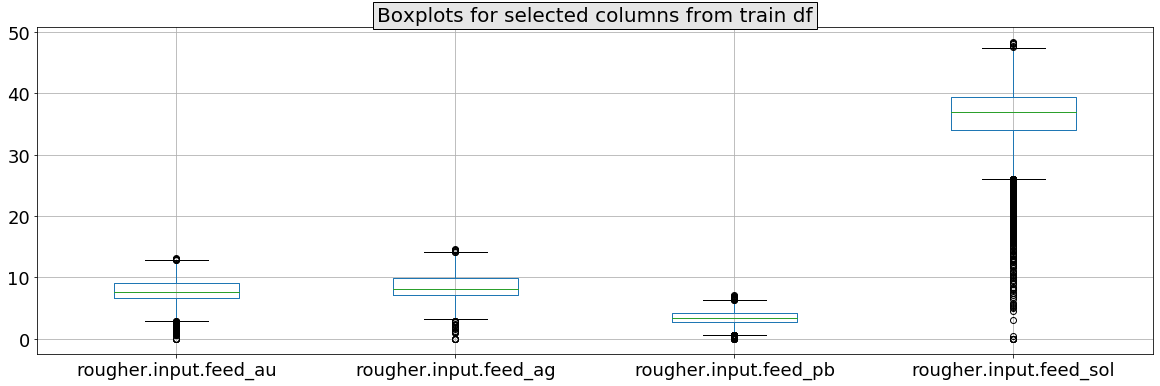

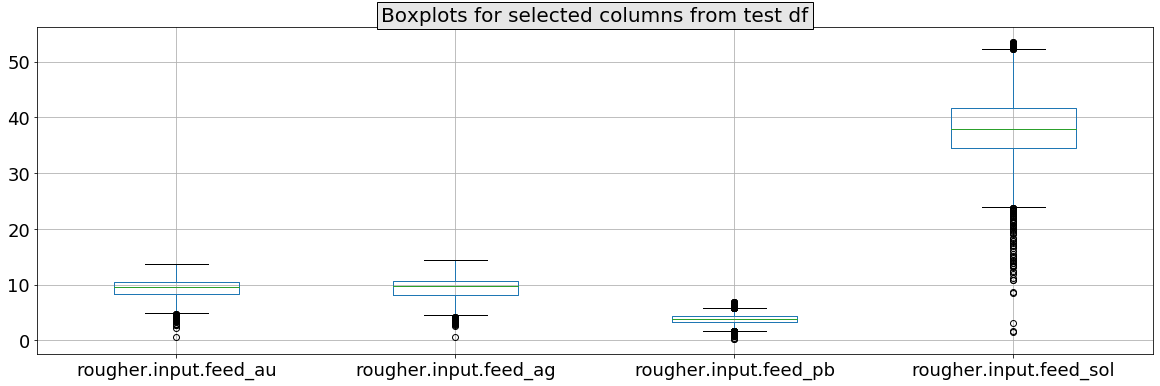

In [35]:
# use boxplots to demonstrate outliers
columns_to_plot = train[stages]
columns_to_plot.boxplot(figsize=(20,6), fontsize=18)
plt.title('Boxplots for selected columns from train df', bbox={'facecolor':'0.9', 'pad':4}, fontsize=20)
plt.show()

columns_to_plot = test_w_targets[stages]
columns_to_plot.boxplot(figsize=(20,6), fontsize=18)
plt.title('Boxplots for selected columns from test df', bbox={'facecolor':'0.9', 'pad':4}, fontsize=20)
plt.show()

primary_cleaner.output.concentrate_au Outliers:  695
primary_cleaner.output.concentrate_au Pct: 13.14%
primary_cleaner.output.concentrate_ag Outliers:  366
primary_cleaner.output.concentrate_ag Pct: 6.92%
primary_cleaner.output.concentrate_pb Outliers:  504
primary_cleaner.output.concentrate_pb Pct: 9.53%
primary_cleaner.output.concentrate_sol Outliers:  3
primary_cleaner.output.concentrate_sol Pct: 0.06%
rougher.output.concentrate_au Outliers:  617
rougher.output.concentrate_au Pct: 11.66%
rougher.output.concentrate_ag Outliers:  486
rougher.output.concentrate_ag Pct: 9.19%
rougher.output.concentrate_pb Outliers:  808
rougher.output.concentrate_pb Pct: 15.27%
rougher.output.concentrate_sol Outliers:  762
rougher.output.concentrate_sol Pct: 14.40%
final.output.concentrate_au Outliers:  876
final.output.concentrate_au Pct: 16.56%
final.output.concentrate_ag Outliers:  454
final.output.concentrate_ag Pct: 8.58%
final.output.concentrate_pb Outliers:  379
final.output.concentrate_pb Pct: 7

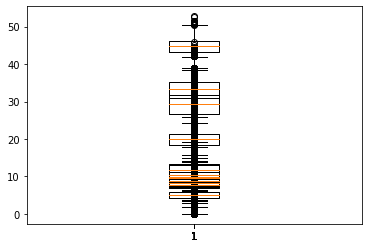

In [36]:
# check for outliers in train df input feed columns
for s in stages2:
    boxplot = plt.boxplot(train[s].values)
    outliers = list(boxplot["fliers"][0].get_data()[1])
    print(s, "Outliers: ", len(outliers))
    pct = len(outliers)/len(test_w_targets)
    print(s, "Pct: {:.2%}".format(pct))

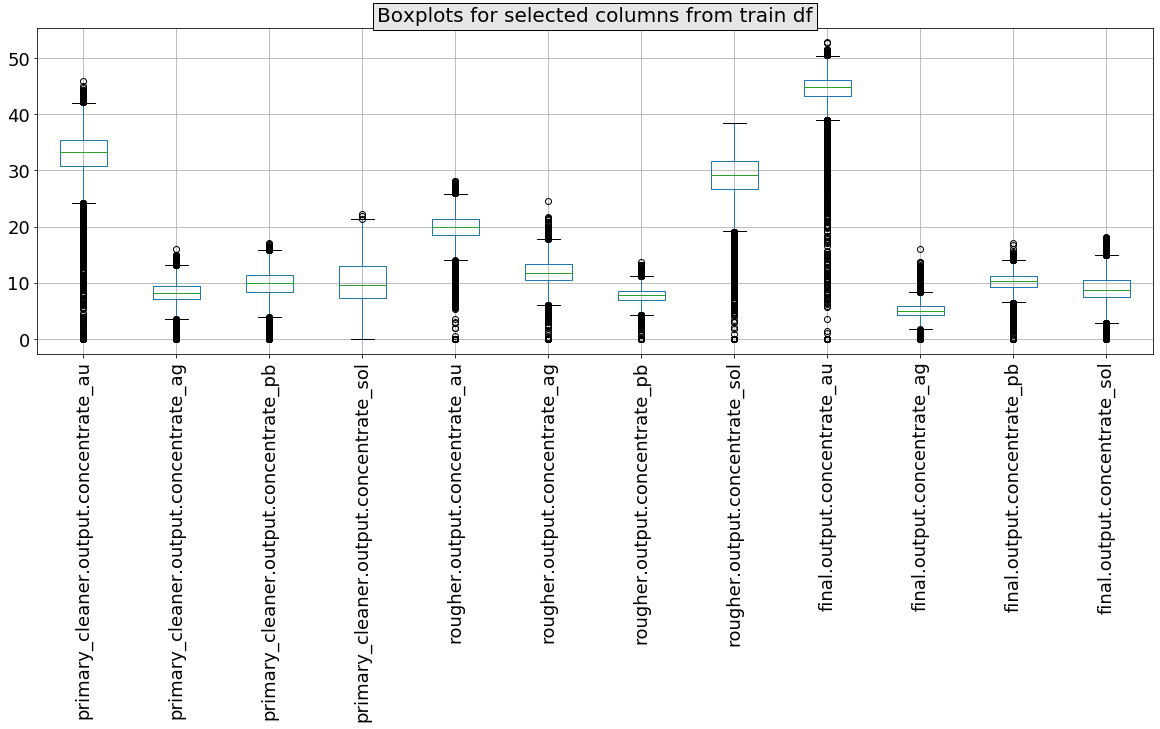

In [37]:
# use boxplots to demonstrate outliers
columns_to_plot = train[stages2]
columns_to_plot.boxplot(figsize=(20,6), fontsize=18)
plt.title('Boxplots for selected columns from train df', bbox={'facecolor':'0.9', 'pad':4}, fontsize=20)
plt.xticks(rotation=90)
plt.show()

The boxplot method clearly shows there are outliers that need to be handled. Most of the columns have both high and low outliers.

We will use rougher.input.feed_* from the train and test dfs for our models and the percent of outliers in those columns is low, less than 4%. We will remove those outliers using the conventional IQR method..

We also looked at other columns associated without output stages for the training column. While these columns won't be used for our model, it is interesting to note they have greater percentage of outliers. This suggests the processing of the ore through the stages produces different results depending on the various solvents, timing, etc.

We will also create a new df where we remove the outliers for the other train columns we looked at (the ones not involved in the target or features aspects), even though these columns won't be used in our planned analysis. In a real world scenario, it is unlikely we would need to remove these outliers since the columns will not be used, but for this exercise it may be a requirement.

In [38]:
# note shape of dfs before removing outliers
test_before = test_w_targets.shape
train_before = train.shape

# create method to remove outliers
def remove_outliers(df_in, col):

    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col] > lower_bound) & (df_in[col] < upper_bound)]
    return df_out

test_df = remove_outliers(test_w_targets, 'rougher.input.feed_au')
test_df = remove_outliers(test_df, 'rougher.input.feed_ag')
test_df = remove_outliers(test_df, 'rougher.input.feed_pb')
test_df = remove_outliers(test_df, 'rougher.input.feed_sol')

train_df = remove_outliers(train, 'rougher.input.feed_au')
train_df = remove_outliers(train_df, 'rougher.input.feed_ag')
train_df = remove_outliers(train_df, 'rougher.input.feed_pb')
train_df = remove_outliers(train_df, 'rougher.input.feed_sol')

train_df2 = remove_outliers(train_df, 'primary_cleaner.output.concentrate_au')
train_df2 = remove_outliers(train_df2, 'primary_cleaner.output.concentrate_ag')
train_df2 = remove_outliers(train_df2, 'primary_cleaner.output.concentrate_pb')
train_df2 = remove_outliers(train_df2, 'primary_cleaner.output.concentrate_sol')

train_df2 = remove_outliers(train_df2, 'rougher.output.concentrate_au')
train_df2 = remove_outliers(train_df2, 'rougher.output.concentrate_ag')
train_df2 = remove_outliers(train_df2, 'rougher.output.concentrate_pb')
train_df2 = remove_outliers(train_df2, 'rougher.output.concentrate_sol')

train_df2 = remove_outliers(train_df2, 'final.output.concentrate_au')
train_df2 = remove_outliers(train_df2, 'final.output.concentrate_ag')
train_df2 = remove_outliers(train_df2, 'final.output.concentrate_pb')
train_df2 = remove_outliers(train_df2, 'final.output.concentrate_sol')

In [39]:
test_after = test_df.shape
train_after = train_df.shape
train2_after = train_df2.shape
print('Shapes and percent remaining after removing outliers')
print('Test before and after:', test_before, test_after, test_after[0]/test_before[0])
print('Train before and after:', train_before, train_after, train_after[0]/train_before[0])
print('Train2 before and after:', train_before, train2_after, train2_after[0]/train_before[0])

Shapes and percent remaining after removing outliers
Test before and after: (5290, 54) (4989, 54) 0.9431001890359169
Train before and after: (14149, 86) (13444, 86) 0.950173157113577
Train2 before and after: (14149, 86) (9836, 86) 0.6951728037317125


So we clearly see that removing all the outliers for the columns we will not be using in our model analysis would leave us only 69% of our working df. This is not acceptable.

Now we will use the test_df where we removed the rougher.input.feed_* outliers and the train_df where we removed the rougher.input.feed_* outliers. This leaves us with over 94% of the working datframe.

# Build the model
# 3.1. Write a function to calculate the final sMAPE value.

Use these formulas for evaluation metrics:
 
$sMAPE= \frac{1}{N} \sum_{i=1}^{N} \frac {|y_i-\hat{y_i}|}{(|y_i|+|\hat{y_i}|)/2} \times 100\% $

$Final\hspace{0.2cm}sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)$

In [40]:
# smape functions
def smape_helper(target, predicted):
    ratio = np.divide(np.abs(target - predicted), (np.abs(target)+np.abs(predicted))/2)
    value = np.nanmean(ratio, axis=0) # change from np.average to np.nanmean
    # print('value', value)
    return value

def smape(targeted, predicted):

    # targeted and predicted are each 2 column arrays with rougher and final
    smape_rougher = smape_helper(targeted[:, 0], predicted[:, 0])
    # print(smape_rougher)
    smape_final = smape_helper(targeted[:, 1], predicted[:, 1])
    # print(smape_final)
    value = 0.25 * smape_rougher + 0.75 * smape_final
    return value

# added greater_is_better=False to make_scorer which multiplies the fx by -1 
# to avoid the default maximizing the score and therefore the error value
smape_scorer = make_scorer(smape, greater_is_better=False) #, greater_is_better=False


In [41]:
train[['rougher.output.recovery', 'final.output.recovery']]

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
16855,89.574376,73.755150
16856,87.724007,69.049291
16857,88.890579,67.002189
16858,89.858126,65.523246


In [42]:
train[['rougher.output.recovery', 'final.output.recovery']].values[0]

array([87.10776293, 70.54121591])

In [43]:
train[['rougher.output.recovery', 'final.output.recovery']].values[:, 0]

array([87.10776293, 86.84326051, 86.84230826, ..., 88.89057853,
       89.858126  , 89.51495973])

# 3.2. Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [44]:
# define targets and features (columns shared between test and train not = to target)
target = ['rougher.output.recovery', 'final.output.recovery']
features = list(set(train.columns).intersection(set(test.columns)).difference(set(target)))

In [45]:
# create the features and target groups for test_df and train_df dfs
X_train, X_test = train_df[features].values, test_df[features].values # features
y_train, y_test = train_df[target].values, test_df[target].values # targets

In [46]:
# check the dummy regressor (uses simple rules to form a baseline)
dm = DummyRegressor(strategy='mean').fit(X_train, y_train)
y_pred = dm.predict(X_test)
print(y_pred) # demonstrates is a constant model
print('smape dummy regressor:', smape(y_test, y_pred))

[[83.03365492 67.00731223]
 [83.03365492 67.00731223]
 [83.03365492 67.00731223]
 ...
 [83.03365492 67.00731223]
 [83.03365492 67.00731223]
 [83.03365492 67.00731223]]
smape dummy regressor: 0.09412557092656515


In [47]:
# check results with a linear regression model 
def lin_reg(features_train, features_test, target_train, target_test):
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_test= scaler.transform(features_test)
    lr = LinearRegression().fit(features_train,target_train)
    predicted_values = lr.predict(features_test)
    print(predicted_values)
    smape = cross_val_score(lr, features_train, target_train, cv=5, scoring=smape_scorer)
    lr_smape = smape.mean()
    print("average smape:", lr_smape)
    print('R2', lr.score(features_test, target_test))
    print('RMSE:', np.sqrt(mean_squared_error(target_test, predicted_values)))
    print('Average Volume of Predicted Reserve:',predicted_values.mean() )
    return lr_smape

lr_smape = lin_reg(X_train, X_test, y_train, y_test)
#average smape: 0.1166857283231566
#average smape: -0.11668572832315663

[[88.48462473 72.45094294]
 [90.59790884 72.25977602]
 [90.26085423 72.46207256]
 ...
 [86.62768301 75.6599287 ]
 [88.17646335 73.45190161]
 [87.99989335 74.57770816]]
average smape: -0.11668572832315653
R2 -0.057033813404567965
RMSE: 11.288631855795458
Average Volume of Predicted Reserve: 77.27910293816169


In [48]:
# decision tree regressor model
params = {'min_samples_split': range(2, 10, 2), 'max_depth': range(4,8,2)}
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=random_state),param_grid=params,scoring=smape_scorer, cv=5, refit=True)
g_cv.fit(X_train, y_train)
best_params = g_cv.best_params_

dtr = DecisionTreeRegressor(**best_params).fit(X_train, y_train)
scores_dtr = cross_val_score(dtr, X_train, y_train, cv=5, scoring=smape_scorer)
print("average smape:", scores_dtr.mean())
scores_dtr
#average smape: 0.10814605362397918
#average smape: nan


average smape: -0.11000734576469191


array([-0.10059963, -0.09863175, -0.11807682, -0.12834268, -0.10438586])

In [49]:
# random forest tree regressor model
params = {'min_samples_split': range(2, 6, 2)}
rf_cv = GridSearchCV(RandomForestRegressor(random_state=random_state),param_grid=params,scoring=smape_scorer, cv=5, refit=True)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_

rfr = RandomForestRegressor(**best_params).fit(X_train, y_train)
scores_rfr = cross_val_score(rfr, X_train, y_train, cv=5, scoring=smape_scorer)

print("average smape:", scores_rfr.mean())
scores_rfr
#average smape: 0.11586296538031948
#average smape: -0.12118415109881006

average smape: -0.11957924132029385


array([-0.1034535 , -0.13967549, -0.11632805, -0.13440891, -0.10403026])

In [50]:
# check the dummy regressor (uses simple rules to form a baseline)
dm = DummyRegressor(strategy='mean').fit(X_train, y_train)
y_pred = dm.predict(X_test)
print(y_pred) # shows this is a constant
print('smape random regressor:', smape(y_test, y_pred))

[[83.03365492 67.00731223]
 [83.03365492 67.00731223]
 [83.03365492 67.00731223]
 ...
 [83.03365492 67.00731223]
 [83.03365492 67.00731223]
 [83.03365492 67.00731223]]
smape random regressor: 0.09412557092656515


In [51]:
# create overview of smape for different models
print('The dummy model ended up outpeforming the three models tested!')
print('Dummy model:', (smape(y_test, y_pred).round(4)))
print('Decision tree regressor:', scores_dtr.mean().round(4))
print('Linear regression:', lr_smape.round(4))
print('Random forest regressor:', scores_rfr.mean().round(4))

The dummy model ended up outpeforming the three models tested!
Dummy model: 0.0941
Decision tree regressor: -0.11
Linear regression: -0.1167
Random forest regressor: -0.1196


Conclusion:

We can conclude that the constant dummy model based on simple calculations performed better than the three ML models we used (linear regression, decision tree regressor and random forest regressor).

We were tasked with finding a ML model that best predicts the two target values ('rougher.output.recovery', 'final.output.recovery') given the predictor variables present in both the test and train dataframes. None of the models we tested and tuned worked better than the dummy model.

# References

[forward fill aka ffill](https://www.geeksforgeeks.org/python-pandas-dataframe-ffill/)

[sMAPE](https://help.anaplan.com/685ff9b2-6370-46ba-af10-679405937113-Understand-advanced-metrics)
The symmetric mean absolute percentage error (SMAPE) is an accuracy measure based on percentage (or relative) errors. 

Relative error is the absolute error divided by the magnitude of the exact value. 

In contrast to the mean absolute percentage error, SMAPE has both a lower bound and an upper bound. Since it's percentage-based, it's scale-independent, which means that it can be used to compare forecast performances between datasets. 

A limitation to SMAPE is that if the actual value or forecast value is 0, the value of error will approach 100%. The lower the SMAPE value of a forecast, the higher its accuracy. 

[Simple SMAPE](https://www.statology.org/smape-python/)

[sktime mape](https://www.sktime.org/en/v0.7.0/api_reference/modules/auto_generated/sktime.performance_metrics.forecasting.MeanAbsolutePercentageError.html)

[Check for duplicates in columns](https://stackoverflow.com/questions/50242968/check-for-duplicate-values-in-pandas-dataframe-column)

[Loop to remove outliers](https://stackoverflow.com/questions/62188820/for-loop-through-a-function-an-dataframe-python)